In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

Consider a Linear System of two equations, \
$x+y=6$\
$x-y=-4$\
Let us plot the linear systems...

array([1., 5.])

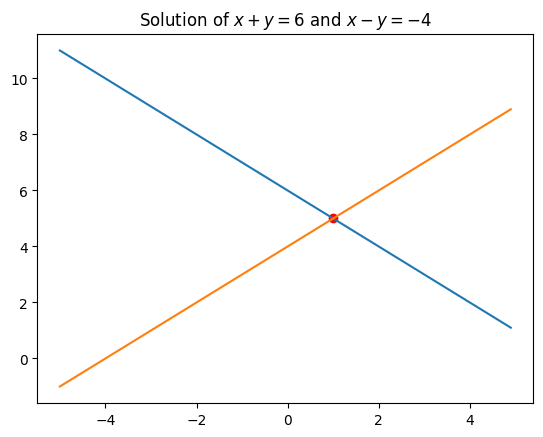

In [18]:
plt.figure()
A = np.array([[1,1],[1,-1]])
b = np.array([6,-4])

x = np.linalg.inv(A)@b
display(x)

xrange = np.arange(-5,5,0.1)
y1 = 6-xrange
y2 = 4+xrange
plt.plot(xrange,y1)
plt.plot(xrange,y2)
plt.scatter(x[0],x[1],color='r')
plt.title("Solution of $x+y=6$ and $x-y=-4$")
plt.show()

Drawing a plane\
$z=x+y$

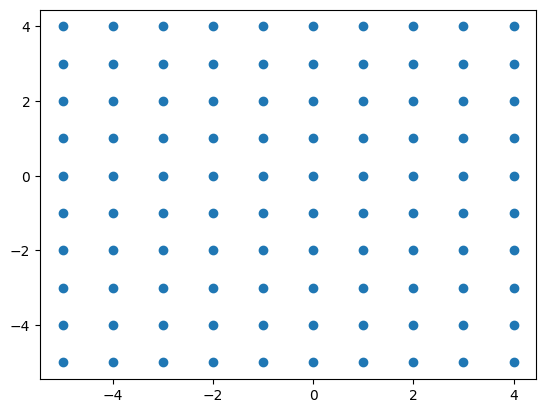

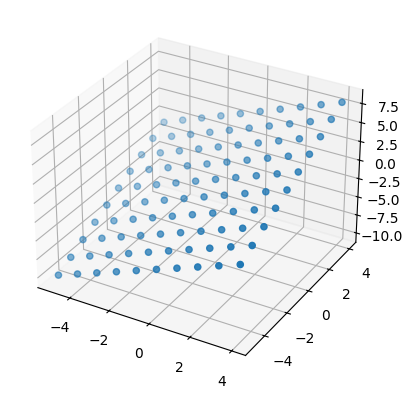

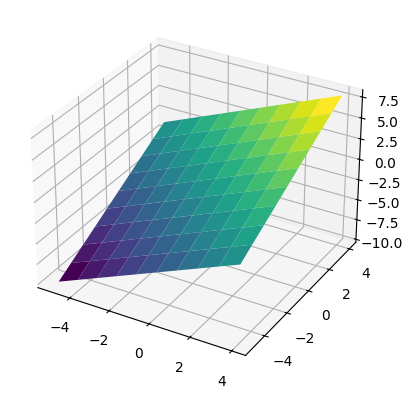

In [36]:
X,Y = np.meshgrid(xrange,xrange)
xrange = np.arange(-5,5,1)
plt.clf()
plt.scatter(X,Y)
Z = X+Y
plt.show()
fig_3d_scatter = plt.figure()
ax_3d_scatter = fig_3d_scatter.add_subplot(projection='3d')
ax_3d_scatter.scatter3D(X,Y,Z)
plt.show()
fig_3d_surface = plt.figure()
ax_3d_surface = fig_3d_surface.add_subplot(projection='3d')
ax_3d_surface.plot_surface(X,Y,Z,cmap='viridis')
plt.show()

### Plotting a Linear System of Equations

$x_1 - 2x_2 + x_3 = 0$\
$2x_2 - 8x_3 = 0$\
$-4x_1 + 5x_2 + 9x_3 = 0$

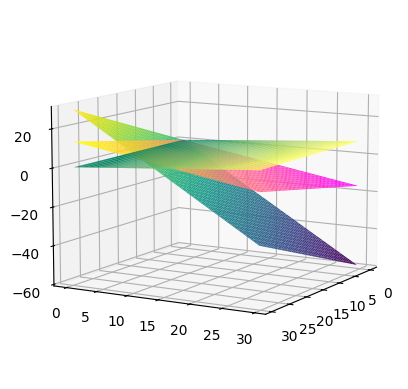

In [28]:
figure_multiple_planes = plt.figure()
ax_mul_plane = figure_multiple_planes.add_subplot(111,projection='3d')

# Hyperplane 1
x1 = np.arange(0,30,0.5)
x2 = np.arange(0,30,0.5)
X1,X2 = np.meshgrid(x1,x2)
X3 = X1 - 2*X2
ax_mul_plane.plot_surface(X1,X2,X3,cmap='viridis')
ax_mul_plane.view_init(10,30)

# Hyperplane 2
X3 = (0.25)*X2
ax_mul_plane.plot_surface(X1,X2,X3,cmap='summer')

# Hyperplane 3
X3 = (4*X1 - 5*X2)/9
ax_mul_plane.plot_surface(X1,X2,X3,cmap='spring')

plt.show()

Infinite Solutions

$y-z=4$\
$2x+y+2z=4$\
$2x+2y+z=8$


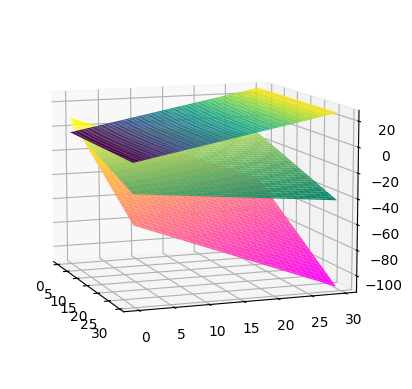

In [35]:
figure_multiple_planes = plt.figure()
ax_mul_plane = figure_multiple_planes.add_subplot(111,projection='3d')

# Hyperplane 1
x1 = np.arange(0,30,0.5)
x2 = np.arange(0,30,0.5)
X1,X2 = np.meshgrid(x1,x2)
X3 = X2-4
ax_mul_plane.plot_surface(X1,X2,X3,cmap='viridis')
ax_mul_plane.view_init(10,-20)

# Hyperplane 2
X3 = (4-X2-2*X1)/2
ax_mul_plane.plot_surface(X1,X2,X3,cmap='summer')

# Hyperplane 3
X3 = 8-2*X1 - 2*X2
ax_mul_plane.plot_surface(X1,X2,X3,cmap='spring')

plt.show()

In [44]:
A = sp.Matrix([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
display(A)
B = A.rref()
display(type(B))
display(B)

Matrix([
[1,  2,  3,  4],
[5,  6,  7,  8],
[9, 10, 11, 12]])

tuple

(Matrix([
 [1, 0, -1, -2],
 [0, 1,  2,  3],
 [0, 0,  0,  0]]),
 (0, 1))

### Polynomials - Vandermonde Method

Let’s say you are given three points, $(2,5),(5,2),(7,10)$ and you wanted to find the quadratic polynomial \
$y=ax^2+bx+c$ that passes through those three points.

$ 5 = a_0(2^2) + a_1(2) + a_2$\
$ 2 = a_0(5^2) + a_1(5) + a_2$\
$ 10 = a_0(7^2) + a_1(7) + a_2$

In [45]:
# For finding the polynomial...
A = np.array([[4,2,1],[25,5,1],[49,7,1]])
b = np.array([5,2,10])
x = np.linalg.inv(A)@b
x

array([ 1., -8., 17.])

The Polynomial is $x^2 - 8x + 17$

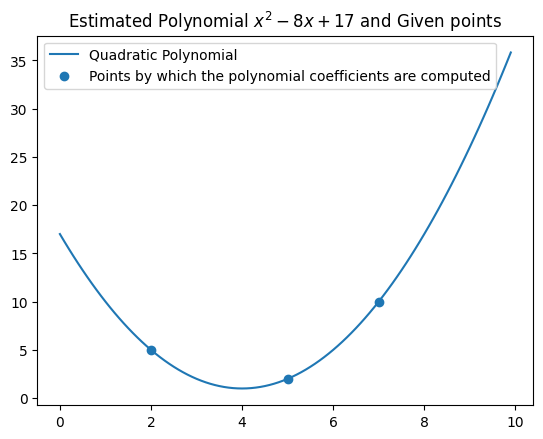

In [51]:
# Checking of the consistency
x = np.arange(0,10,0.1)
y = x*x - 8*x + 17
plt.figure()
plt.plot(x,y)
xpoints=[2,5,7]
ypoints=[5,2,10]
plt.scatter(xpoints,ypoints)
plt.legend(["Quadratic Polynomial","Points by which the polynomial coefficients are computed"])
plt.title("Estimated Polynomial $x^2 -8x + 17$ and Given points")
plt.show()

### Inverse of a Matrix using RREF

Let $A$ be the following matrix:

$$
A = \begin{bmatrix}
2 & 1 & 1 \\
1 & 1 & 2 \\
1 & 2 & 1
\end{bmatrix}
$$

Find the Inverse of the matrix using rref

In [ ]:
# Augmenting the matrix
A = np.array([[2,1,1],[1,1,2],[1,2,1]])
Aug = np.block([A,np.eye(3)])
display(Aug)

# Apply RREF
Augrref = sp.Matrix(Aug).rref()
Augrref=Augrref[0]
Augrref[:,3:6] # is the inverse of the matrix given

array([[2., 1., 1., 1., 0., 0.],
       [1., 1., 2., 0., 1., 0.],
       [1., 2., 1., 0., 0., 1.]])

Matrix([
[ 0.75, -0.25, -0.25],
[-0.25, -0.25,  0.75],
[-0.25,  0.75, -0.25]])

Determine the values of $\lambda$ such that the matrix
is not invertible.

$$
A = \begin{bmatrix}
3 & \lambda & 1 \\
2 & -1 & 6 \\
1 & 9 & 4
\end{bmatrix}
$$


In [99]:
lamb = sp.symbols('lambda')
A = sp.Matrix([[3,lamb,1],[2,-1,6],[1,9,4]])
detA = A.det()
sp.solve(sp.Eq(detA,0))

[-155/2]

### Cramer's rule

to solve\
$ 5 = a_0(2^2) + a_1(2) + a_2$\
$ 2 = a_0(5^2) + a_1(5) + a_2$\
$ 10 = a_0(7^2) + a_1(7) + a_2$

In [110]:
A = np.array([[4,2,1],[25,5,1],[49,7,1]])
b = np.array([5,2,10])

A1 = A.copy()
A1[:,0]=b
display(A1)
x1 = np.linalg.det(A1)/np.linalg.det(A)
A2 = A.copy()
A2[:,1]=b
display(A2)
x2 = np.linalg.det(A2)/np.linalg.det(A)
A3 = A.copy()
A3[:,2]=b
display(A3)
x3 = np.linalg.det(A3)/np.linalg.det(A)
[x1,x2,x3]

array([[ 5,  2,  1],
       [ 2,  5,  1],
       [10,  7,  1]])

array([[ 4,  5,  1],
       [25,  2,  1],
       [49, 10,  1]])

array([[ 4,  2,  5],
       [25,  5,  2],
       [49,  7, 10]])

[np.float64(1.0000000000000009),
 np.float64(-8.000000000000012),
 np.float64(17.00000000000001)]

### LU Decomposition
$
2x+5y+2z=−38\\
3x−2y+4z=17\\
−6x+y−7z=−12\\
$

In [16]:
import scipy as sc
A = np.array([[2,5,2],[3,-2,4],[-6,1,-7]])
b = np.array([-38,17,-12])

P,L,U = sc.linalg.lu(A)

display(P)
display(L)
display(U)

np.array_equal(P@L@U,A)

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

array([[ 1.        ,  0.        ,  0.        ],
       [-0.33333333,  1.        ,  0.        ],
       [-0.5       , -0.28125   ,  1.        ]])

array([[-6.        ,  1.        , -7.        ],
       [ 0.        ,  5.33333333, -0.33333333],
       [ 0.        ,  0.        ,  0.40625   ]])

True

In [36]:
# Solution x
# Solve Ly = b
# Then solve Ux = y

# Ly = b
Aug = np.column_stack((P@L,b))
Augrref=sp.Matrix(Aug).rref()
y = Augrref[0][:,3]

# Ux = y
Aug = np.column_stack((U,y))
Augrref = sp.Matrix(Aug).rref()
x = Augrref[0][:,3]
display(x)

display(A@x)

Matrix([
[ 3.0],
[-8.0],
[-2.0]])

Matrix([
[-38.0],
[ 17.0],
[-12.0]])

### Cholesky Decomposition

In [41]:
A = np.array([[1, 0.8, 0.7], [0.8, 1, 0.4], [0.7, 0.5, 1]])

L = np.linalg.cholesky(A)
display(L)
L@L.T

array([[ 1.        ,  0.        ,  0.        ],
       [ 0.8       ,  0.6       ,  0.        ],
       [ 0.7       , -0.1       ,  0.70710678]])

array([[1. , 0.8, 0.7],
       [0.8, 1. , 0.5],
       [0.7, 0.5, 1. ]])

### Linear Combinations

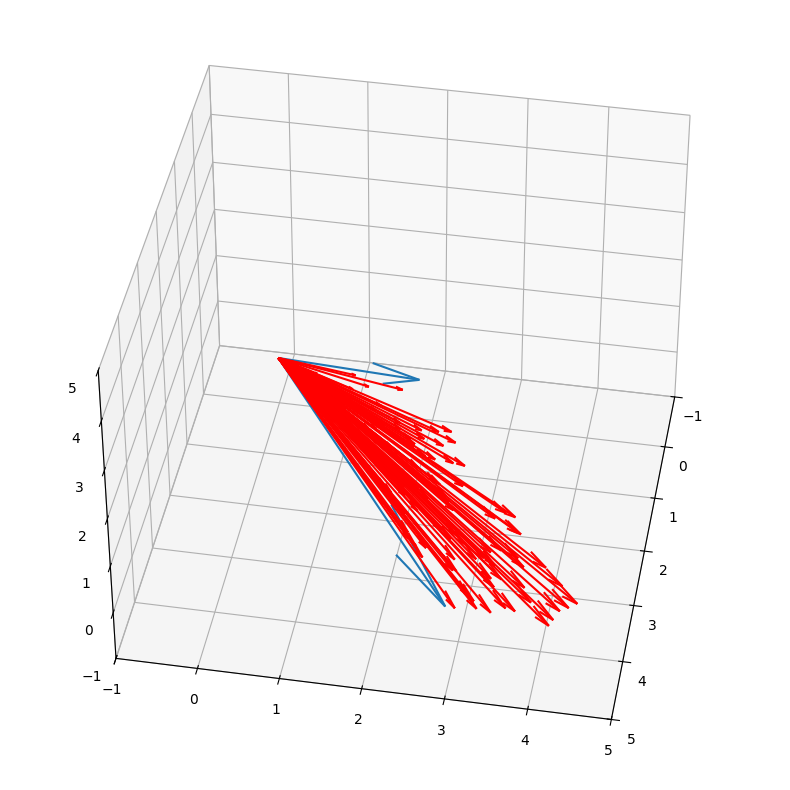

In [91]:
# Linear Combinations of 2 vectors in R3
v1 = np.array([5,3,1])
v2 = np.array([1,2,1])

# Create 100 Linear Combinations
N = 100
A = np.zeros((3,N))
for i in range(100):
    x=np.random.random((2,1))
    A[:,i] = x[0]*v1 + x[1]*v2

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.quiver(0,0,0,A[0,:],A[1,:],A[2,:],color='r',arrow_length_ratio=0.05 )
ax.quiver(0,0,0,v1[0],v1[1],v1[2])
ax.quiver(0,0,0,v2[0],v2[1],v2[2])
ax.set_xlim([-1, 5]) 
ax.set_ylim([-1, 5])  
ax.set_zlim([-1, 5])
ax.view_init(azim=10,elev=400)
plt.show()

Finding Null Space and Visualizing it 

In [ ]:
r = 2
m = 3
n = 3
N = 100
A = np.random.random((3,2))@np.random.random((2,3))

vecs = np.random.random((3,N))
vecs_lc = A@vecs

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.quiver3D(0,0,0,vecs[0,:],vecs[1,:],vecs[2,:],color='y',arrow_length_ratio=0.05)
ax.quiver3D(0,0,0,vecs_lc[0,:],vecs_lc[1,:],vecs_lc[2,:],color='r',arrow_length_ratio=0.05)
ax.set_xlim([-0.05,1.7])
ax.set_ylim([-0.05,1.7])
ax.set_zlim([-0.05,1.7])
ax.view_init(elev=30,azim=80)
plt.show()

array([[0.16464788, 0.68993447, 0.54385671],
       [0.24449476, 1.11610916, 1.0104155 ],
       [0.28186872, 1.10938603, 0.77217821]])

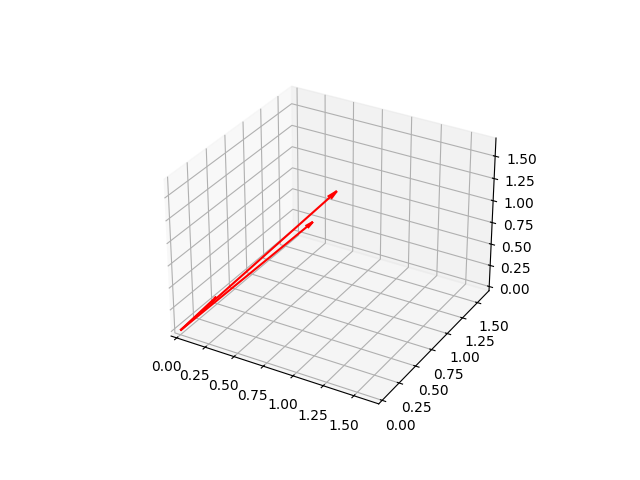

In [ ]:
A = np.random.random((3,2))@np.random.random((2,3))
display(A)l
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.quiver3D(0,0,0,A[0,:],A[1,:],A[2,:],color='r',arrow_length_ratio=0.05)
ax.set_xlim([-0.05,1.7])
ax.set_ylim([-0.05,1.7])
ax.set_zlim([-0.05,1.7])
plt.show()
